In [4]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [5]:
X_train_path = '../data/processed/X_train.csv'
X_test_path = '../data/processed/X_test.csv'
y_train_path = '../data/processed/y_train.csv'
y_test_path = '../data/processed/y_test.csv'

X_train = pd.read_csv(X_train_path)
X_test = pd.read_csv(X_test_path)
y_train = pd.read_csv(y_train_path).squeeze()
y_test = pd.read_csv(y_test_path).squeeze()

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("\nFeatures:", X_train.columns.tolist())

Training set shape: (121310, 10)
Test set shape: (30328, 10)

Features: ['PartyType_Code', 'Sobriety_Code', 'Age', 'PrimaryCollisionFactor_Code', 'CollisionType_Code', 'VehicleDamage_Code', 'MovementPrecedingCollision_Code', 'ViolationCode', 'CrashTime', 'Distance']


Accuracy Score: 0.6773278818253758
Classification Report:
              precision    recall  f1-score   support

    NoInjury       0.79      0.85      0.82     16695
       Minor       0.53      0.64      0.58      8507
    Moderate       0.43      0.18      0.25      3967
      Severe       0.41      0.07      0.11       896
       Fatal       0.44      0.18      0.25       263

    accuracy                           0.68     30328
   macro avg       0.52      0.38      0.40     30328
weighted avg       0.65      0.68      0.65     30328



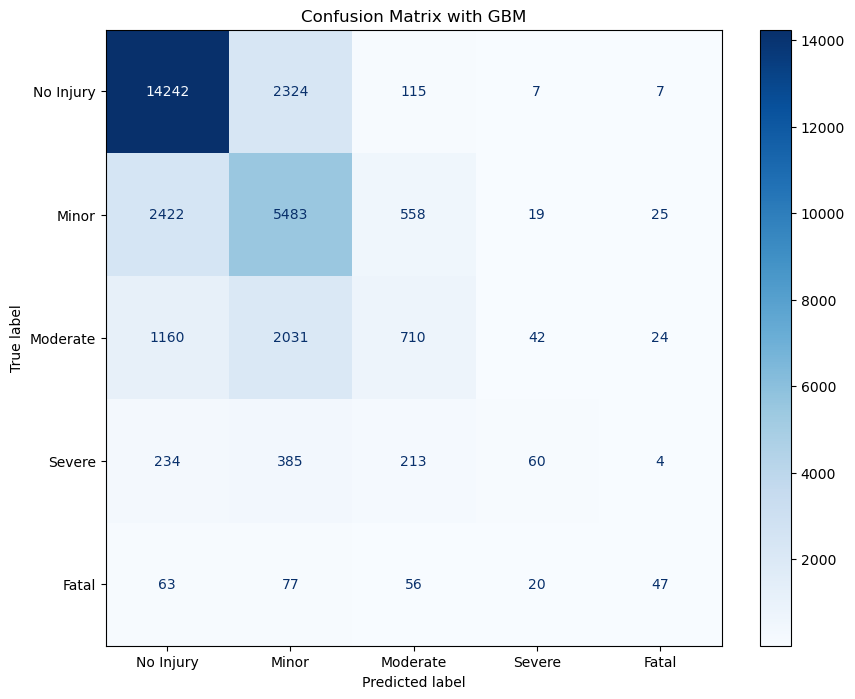

In [6]:
severity_mapping = {'NoInjury': 0, 'Minor': 1, 'Moderate': 2, 'Severe': 3, 'Fatal': 4}
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Optional, depending on your data's feature scale
    ('gbm', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
])

# Train the model on the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=severity_mapping.keys()))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=['No Injury', 'Minor', 'Moderate', 'Severe', 'Fatal'])  
disp.plot(cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix with GBM')
plt.show()